<a href="https://colab.research.google.com/github/PratyushaChatterjee/ML-works/blob/main/Data_Cleaning_audible_uncleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import io
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('/content/drive/My Drive/audible_uncleaned.csv')
# print first 5 rows of the dataset
data.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [5]:
# print last 5 rows of the dataset
data.tail()

,name,author,narrator,time,releasedate,language,stars,price
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00
87488,Havana,Writtenby:MarkKurlansky,Narratedby:FleetCooper,6 hrs and 1 min,07-03-17,English,Not rated yet,569.00


In [6]:
data.shape

(87489, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [8]:
# checking for missing values
data.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

In [9]:
# Handle missing values
# Option 1: Drop rows with missing values
data_cleaned = data.dropna()
print(data_cleaned)

                                             name                     author  \
0                      Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                                The Burning Maze      Writtenby:RickRiordan   
2                                    The Deep End       Writtenby:JeffKinney   
3                            Daughter of the Deep      Writtenby:RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   
...                                           ...                        ...   
87484                   Last Days of the Bus Club     Writtenby:ChrisStewart   
87485                                    The Alps    Writtenby:StephenO'Shea   
87486                        The Innocents Abroad        Writtenby:MarkTwain   
87487                       A Sentimental Journey   Writtenby:LaurenceSterne   
87488                                      Havana    Writtenby:MarkKurlansky   

                        narrator       

In [10]:
# Option 2: Impute missing values (if needed, choose appropriate strategy)
# For numerical columns, you can fill missing values with mean/median
# data_cleaned.fillna(data.mean(), inplace=True)

print("\nMissing values after cleaning:")
print(data_cleaned.isnull().sum())


Missing values after cleaning:
name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64


In [11]:
duplicate_rows = data_cleaned.duplicated()
print(f"\nNumber of duplicate rows: {duplicate_rows.sum()}")





Number of duplicate rows: 0


In [12]:
data['price'].fillna(0, inplace=True)  # Replace NaN with 0
data = data[data['price'] != 'Free']  # Exclude rows where price is 'Free'
print(data)

                                             name                     author  \
0                      Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                                The Burning Maze      Writtenby:RickRiordan   
2                                    The Deep End       Writtenby:JeffKinney   
3                            Daughter of the Deep      Writtenby:RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   
...                                           ...                        ...   
87484                   Last Days of the Bus Club     Writtenby:ChrisStewart   
87485                                    The Alps    Writtenby:StephenO'Shea   
87486                        The Innocents Abroad        Writtenby:MarkTwain   
87487                       A Sentimental Journey   Writtenby:LaurenceSterne   
87488                                      Havana    Writtenby:MarkKurlansky   

                        narrator       

In [13]:
# Convert 'releasedate' column to datetime format
data['releasedate'] = pd.to_datetime(data['releasedate'], format='%d-%m-%y')

# Format 'releasedate' column as '01-05-2018'
data['releasedate'] = data['releasedate'].dt.strftime('%d-%m-%Y')


# Print the DataFrame to check the changes
print(data)


                                             name                     author  \
0                      Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                                The Burning Maze      Writtenby:RickRiordan   
2                                    The Deep End       Writtenby:JeffKinney   
3                            Daughter of the Deep      Writtenby:RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   
...                                           ...                        ...   
87484                   Last Days of the Bus Club     Writtenby:ChrisStewart   
87485                                    The Alps    Writtenby:StephenO'Shea   
87486                        The Innocents Abroad        Writtenby:MarkTwain   
87487                       A Sentimental Journey   Writtenby:LaurenceSterne   
87488                                      Havana    Writtenby:MarkKurlansky   

                        narrator       

In [14]:
# Convert 'stars' column to string type
data['stars'] = data['stars'].astype(str)
# Extract stars and rating
stars_rating = data['stars'].str.extract(r'(\d+(\.\d+)?) out of \d+ stars(\d+) ratings')

# Assign stars and rating to new columns
data['stars'] = stars_rating[0]
data['rating'] = stars_rating[2]

# Convert 'stars' column to float type
data['stars'] = data['stars'].astype(float)

# Replace 'Not rated yet' with 0 in 'rating' column
data['rating'] = data['rating'].replace('Not rated yet', 0)

# Convert 'rating' column to float type
data['rating'] = data['rating'].astype(float)

# Print the cleaned DataFrame
print(data)


                                             name                     author  \
0                      Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                                The Burning Maze      Writtenby:RickRiordan   
2                                    The Deep End       Writtenby:JeffKinney   
3                            Daughter of the Deep      Writtenby:RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   
...                                           ...                        ...   
87484                   Last Days of the Bus Club     Writtenby:ChrisStewart   
87485                                    The Alps    Writtenby:StephenO'Shea   
87486                        The Innocents Abroad        Writtenby:MarkTwain   
87487                       A Sentimental Journey   Writtenby:LaurenceSterne   
87488                                      Havana    Writtenby:MarkKurlansky   

                        narrator       

In [15]:
# Remove prefixes from 'author' column
data['author'] = data['author'].str.replace('Writtenby:', '')

# Remove prefixes from 'narrator' column
data['narrator'] = data['narrator'].str.replace('Narratedby:', '')

# Print the cleaned DataFrame
print(data)


                                             name           author  \
0                      Geronimo Stilton #11 & #12  GeronimoStilton   
1                                The Burning Maze      RickRiordan   
2                                    The Deep End       JeffKinney   
3                            Daughter of the Deep      RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1      RickRiordan   
...                                           ...              ...   
87484                   Last Days of the Bus Club     ChrisStewart   
87485                                    The Alps    StephenO'Shea   
87486                        The Innocents Abroad        MarkTwain   
87487                       A Sentimental Journey   LaurenceSterne   
87488                                      Havana    MarkKurlansky   

             narrator                time releasedate language  stars   price  \
0          BillLobely   2 hrs and 20 mins  04-08-2008  English    5.0  468.00 

In [16]:

data['rating'].fillna(0, inplace=True)
data['stars'].fillna(0, inplace=True)

print(data)


                                             name           author  \
0                      Geronimo Stilton #11 & #12  GeronimoStilton   
1                                The Burning Maze      RickRiordan   
2                                    The Deep End       JeffKinney   
3                            Daughter of the Deep      RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1      RickRiordan   
...                                           ...              ...   
87484                   Last Days of the Bus Club     ChrisStewart   
87485                                    The Alps    StephenO'Shea   
87486                        The Innocents Abroad        MarkTwain   
87487                       A Sentimental Journey   LaurenceSterne   
87488                                      Havana    MarkKurlansky   

             narrator                time releasedate language  stars   price  \
0          BillLobely   2 hrs and 20 mins  04-08-2008  English    5.0  468.00 

In [17]:
# Save the cleaned dataset to a CSV file
data.to_csv('/content/drive/My Drive/cleaned_dataset.csv', index=False)



Outliers in the dataset:
                                             name            author  \
0                      Geronimo Stilton #11 & #12   GeronimoStilton   
1                                The Burning Maze       RickRiordan   
2                                    The Deep End        JeffKinney   
3                            Daughter of the Deep       RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1       RickRiordan   
...                                           ...               ...   
86965                    The Happiness of Pursuit   ChrisGuillebeau   
86990                                The Old Ways  RobertMacfarlane   
86993                      Bending Over Backwards      CarloPizzati   
87017                        The Innocents Abroad         MarkTwain   
87018                                    Set Free         EmmaSlade   

               narrator                time releasedate language  stars  \
0            BillLobely   2 hrs and 20 mins  0

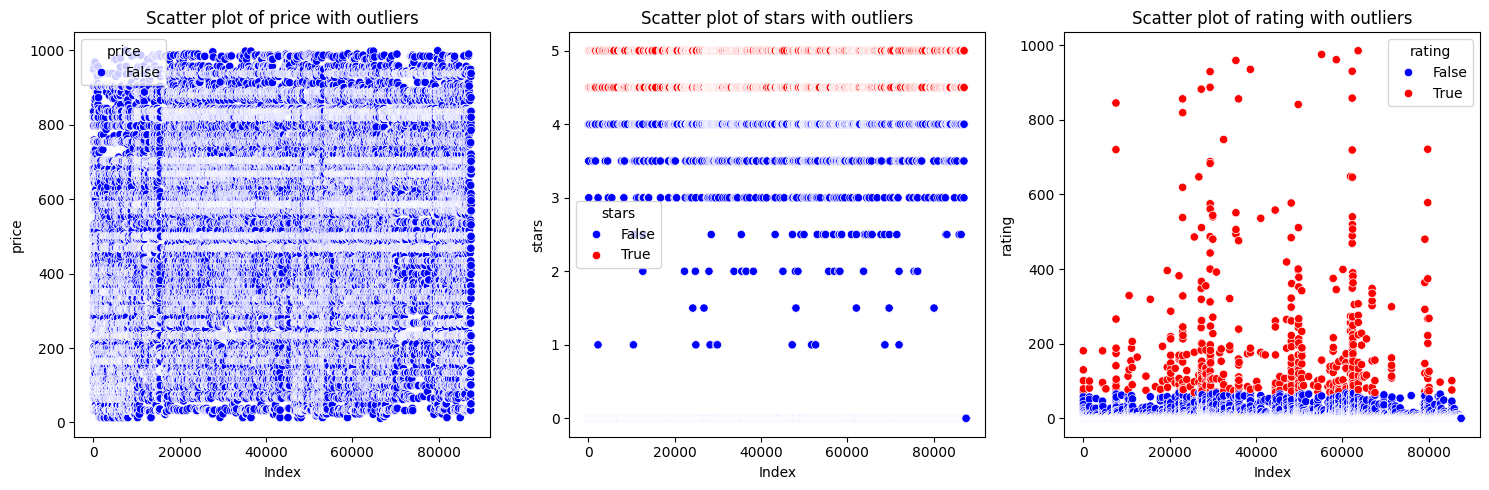

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the columns are numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['stars'] = pd.to_numeric(data['stars'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Drop rows with NaN values in the numerical columns
data.dropna(subset=['price', 'stars', 'rating'], inplace=True)


# Detect outliers using Z-score
def detect_outliers(df, columns):
    outliers = pd.DataFrame(index=df.index)
    for col in columns:
        mean = np.mean(df[col])
        std = np.std(df[col])
        z_scores = (df[col] - mean) / std
        outliers[col] = np.abs(z_scores) > 3  # Outliers if Z-score > 3
    return outliers

# Columns to check for outliers
numerical_columns = ['price', 'stars', 'rating']

# Detect outliers
outliers = detect_outliers(data, numerical_columns)

# Print outliers
outlier_indices = outliers.any(axis=1)
outliers_data = data[outlier_indices]
print("\nOutliers in the dataset:")
print(outliers_data)

# Plot scatter plot for each numerical column highlighting outliers
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

for ax, column in zip(axes, numerical_columns):
    sns.scatterplot(x=data.index, y=data[column], hue=outliers[column], palette={False: 'blue', True: 'red'}, ax=ax)
    ax.set_title(f'Scatter plot of {column} with outliers')
    ax.set_ylabel(column)
    ax.set_xlabel('Index')

plt.tight_layout()
plt.show()


Outliers in the dataset:
                                             name            author  \
0                      Geronimo Stilton #11 & #12   GeronimoStilton   
1                                The Burning Maze       RickRiordan   
2                                    The Deep End        JeffKinney   
3                            Daughter of the Deep       RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1       RickRiordan   
...                                           ...               ...   
86965                    The Happiness of Pursuit   ChrisGuillebeau   
86990                                The Old Ways  RobertMacfarlane   
86993                      Bending Over Backwards      CarloPizzati   
87017                        The Innocents Abroad         MarkTwain   
87018                                    Set Free         EmmaSlade   

               narrator                time releasedate language  stars  \
0            BillLobely   2 hrs and 20 mins  0

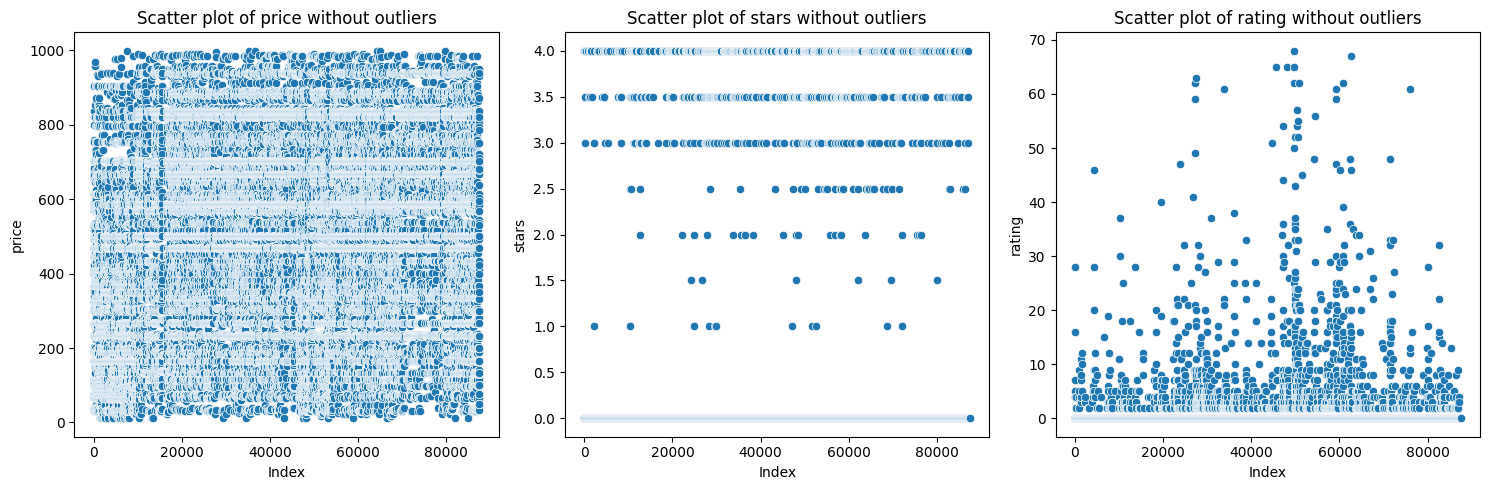

In [19]:
# Ensure the columns are numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['stars'] = pd.to_numeric(data['stars'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Drop rows with NaN values in the numerical columns
data.dropna(subset=['price', 'stars', 'rating'], inplace=True)

# Detect outliers using Z-score
def detect_outliers(df, columns):
    outliers = pd.DataFrame(index=df.index)
    for col in columns:
        mean = np.mean(df[col])
        std = np.std(df[col])
        z_scores = (df[col] - mean) / std
        outliers[col] = np.abs(z_scores) > 3  # Outliers if Z-score > 3
    return outliers

# Columns to check for outliers
numerical_columns = ['price', 'stars', 'rating']

# Detect outliers
outliers = detect_outliers(data, numerical_columns)

# Print outliers
outlier_indices = outliers.any(axis=1)
outliers_data = data[outlier_indices]
print("\nOutliers in the dataset:")
print(outliers_data)

# Remove outliers
data_no_outliers = data[~outlier_indices]

# Print the dataset without outliers
print("\nDataset after removing outliers:")
print(data_no_outliers)

# Plot scatter plot for each numerical column highlighting outliers
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

for ax, column in zip(axes, numerical_columns):
    sns.scatterplot(x=data_no_outliers.index, y=data_no_outliers[column], ax=ax)
    ax.set_title(f'Scatter plot of {column} without outliers')
    ax.set_ylabel(column)
    ax.set_xlabel('Index')

plt.tight_layout()
plt.show()

In [20]:
# Save the cleaned dataset to a CSV file in Colab environment
data.to_csv('cleaned_dataset.csv', index=False)
